# **Section 1 Project By 정희재**

## **Goal of Project**

- 다음 분기에 어떤 게임을 설계할 것인지의 과정과 결과를 보여주고자 한다.
- 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 한다.

🚨 **data description**

- `Name`: 게임 이름

- `Platform`: 게임이 지원되는 플랫폼 이름

- `Year`: 게임이 출시된 연도

- `Genre`: 게임의 장르

- `Publisher`: 게임을 배급한 회사

- `NA_Sales`: 북미지역에서의 출고량

- `EU_Sales`: 유럽지역에서의 출고량

- `JP_Sales`: 일본지역에서의 출고량

- `Other_Sales`: 기타지역에서의 출고량

### `Process 1`:  데이터 전처리 및 정제

In [1]:
# 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/HeeJaeddie/TEST/main/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
# 'Unnamed: 0' 컬럼이 필요없다고 판단, 제외
df = df.iloc[:, 1:] 
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [3]:
# 데이터 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 'Year' 컬럼은 16598개 중 271개의 결측치를 가지므로 전체 데이터 중 2% 미만의 데이터이고, 추후 데이터 처리의 효율성을 위해 대체하는 것보다 삭제하는 것이 낫다고 판단.
# 'Genre' 컬럼은 16598개 중 50개의 결측치를 가지지만, 비교적 중요한 변수라고 생각하여 결측치를 'Unknown' 이라는 이름으로 대체.
# 'Publisher' 컬럼은 16598개 중 58개의 결측치를 가지지만, 'Genre' 컬럼과 마찬가지로 비교적 중요한 변수라고 생각하여 결측치를 'Unknown' 이라는 이름으로 대체.

df.dropna(subset=['Year'], inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [5]:
# 'Name','Platform','Year' 컬럼을 기준으로 중복 데이터 확인
# 중복된 두 개의 행 중 처음 나온 행이 사용할 수 있는 값이 많았고, 나머지 행의 값은 0에 가까워 첫 번째로 나타난 행만 유지하고 나머지 행은 삭제
duplicate_df = df[df.duplicated(subset=['Name','Platform','Year'], keep=False)].sort_values('Name')
duplicate_df.drop_duplicates(subset=['Name','Platform','Year'], inplace=True, keep='first')
duplicate_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22


In [6]:
# 'Name' 컬럼에 오타로 인한 중복 값의 가능성을 두고 확인해보았으나 없음을 확인
duplicate_df2 = df[df.duplicated(subset=['Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], keep=False)].sort_values(by=['Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
duplicate_df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
959,Super Football,2600,1987.0,Sports,Atari,0.07,0,0,0
6290,Super Baseball,2600,1987.0,Sports,Atari,0.07,0,0,0
13136,Outdoors Unleashed: Alaska 3D,3DS,2011.0,Sports,Mastiff,0.01,0,0,0
14992,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0,0,0
6782,Pretty Rhythm Rainbow Live: Kira Kira My * Design,3DS,2013.0,Misc,Takara Tomy,0,0,0.08,0
...,...,...,...,...,...,...,...,...,...
407,Evil Dead: Regeneration,XB,2005.0,Action,THQ,0.06,0.02,0,0
4060,Predator: Concrete Jungle,XB,2005.0,Action,Vivendi Games,0.07,0.02,0,0
15469,Robots,XB,2005.0,Action,Vivendi Games,0.07,0.02,0,0
1880,Urban Chaos: Riot Response,XB,2006.0,Shooter,Eidos Interactive,0.01,0,0,0


In [7]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16327 non-null  object 
 4   Publisher    16327 non-null  object 
 5   NA_Sales     16327 non-null  object 
 6   EU_Sales     16327 non-null  object 
 7   JP_Sales     16327 non-null  object 
 8   Other_Sales  16327 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [8]:
# 모든 출고량 값들을 M 단위로 변환해줌
def convert_sales(sales):
    if 'M' in sales:
        return float(sales.replace('M', '')) 
    elif 'K' in sales:
        return float(sales.replace('K', '')) * 0.001
    else:
        return float(sales) 

df['NA_Sales'] = df['NA_Sales'].apply(convert_sales)
df['EU_Sales'] = df['EU_Sales'].apply(convert_sales)
df['JP_Sales'] = df['JP_Sales'].apply(convert_sales)
df['Other_Sales'] = df['Other_Sales'].apply(convert_sales)

# 알맞은 데이터 타입으로 변경
df['Year'] = df['Year'].astype(int)
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].astype(float)

df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  int64  
 3   Genre        16327 non-null  object 
 4   Publisher    16327 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  float64
 7   JP_Sales     16327 non-null  float64
 8   Other_Sales  16327 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


<AxesSubplot:>

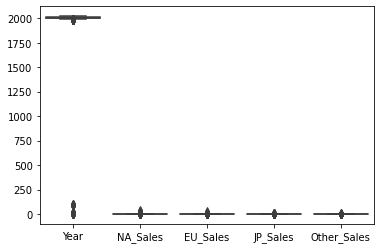

In [10]:
# 이상치 확인
import seaborn as sns
sns.boxplot(data=df)

In [11]:
# 좀 더 자세히 이상치 확인
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=np.number))
outliers = df[np.abs(z_scores) > 3].dropna(how='all')

outliers

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.17,NaN
122,NaN,NaN,NaN,NaN,NaN,5.91,2.38,NaN,0.90
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25,NaN
...,...,...,...,...,...,...,...,...,...
16503,NaN,NaN,NaN,NaN,NaN,NaN,2.51,NaN,0.94
16515,NaN,NaN,NaN,NaN,NaN,3.66,2.42,NaN,0.64
16531,NaN,NaN,NaN,NaN,NaN,14.59,7.06,4.70,2.26
16540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.37,NaN


In [12]:
# Year 컬럼에서 네 자리로 표기되어있지 않은 데이터를 바꿔줌
# Year 컬럼에서 데이터가 적은 2017년(3개)과 2020년(1개)을 drop 함
# 추가로 Platform 이름 중 '2600'이라고 적혀있는 것은 'Atari 2600' 이라는 게임기로 추정되어 따로 처리를 안함
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x >= 20) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)

df_bye1 = df[df['Year']==2017].index
df_bye2 = df[df['Year']==2020].index
df = df.drop(df_bye1)
df = df.drop(df_bye2)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [13]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16323.000000,16323.000000,16323.000000,16323.000000,16323.000000
mean,2006.403664,0.265463,0.147591,0.078677,0.048336
std,5.826954,0.821684,0.508823,0.311593,0.189907
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2016.000000,41.490000,29.020000,10.220000,10.570000


In [14]:
# 총 출고량을 파악할 수 있도록 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' 컬럼을 모두 더하여 'Global_Sales'라는 컬럼을 새로 만들어서 추가함
df.loc[:, 'Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [15]:
# 인덱스 재정렬
df = df.reset_index(drop=True)
df.index = df.index + 1
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16319,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16320,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16321,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16322,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


### `Process 2`: 지역에 따라 선호하는 게임 장르가 다를까?
> 지역은 어떻게 구분할 것인가?

> 지역별로 선호하는 게임의 장르를 파악했는가?

> 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는가?

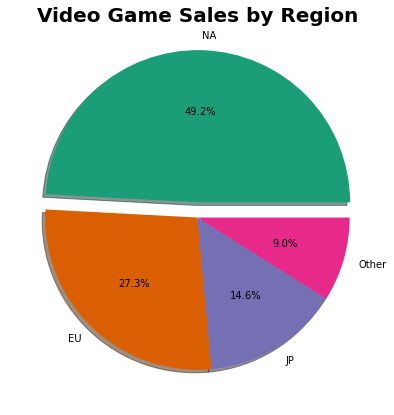

In [16]:
# 비디오 게임 시장의 크기 순으로 NA : 북미, EU : 유럽, JP : 일본, Other : 그 외 다른 지역
# 지역별 총 출고량을 구하여 각각의 비율을 파이차트로 구분해 봄

from matplotlib import pyplot as plt

na_sales_all = df['NA_Sales'].sum()
eu_sales_all = df['EU_Sales'].sum()
jp_sales_all = df['JP_Sales'].sum()
other_sales_all = df['Other_Sales'].sum()

sales_totals = [na_sales_all, eu_sales_all, jp_sales_all, other_sales_all]
labels = ['NA', 'EU', 'JP', 'Other']
explode = [0.1, 0, 0, 0]

plt.rcParams["figure.figsize"] = (10, 7)

plt.pie(sales_totals, labels=labels, autopct='%1.1f%%', 
        colors=plt.get_cmap('Dark2').colors, explode=explode, shadow=True)
plt.title('Video Game Sales by Region', fontsize=20, fontweight='bold')
plt.show()

In [17]:
# 지역별로 장르를 기준으로 총 출고량을 각각 파악해 봄
# 지역마다 선호하는 장르가 다르다는 것이 파악됨

import plotly.graph_objects as go

sales_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=sales_genre['Genre'], y=sales_genre['NA_Sales'], name='NA Sales', 
                     marker=dict(color='#0099ff', opacity=0.8, line=dict(color='white', width=0.5))))
fig.add_trace(go.Bar(x=sales_genre['Genre'], y=sales_genre['EU_Sales'], name='EU Sales', 
                     marker=dict(color='#ff6699', opacity=0.8, line=dict(color='white', width=0.5))))
fig.add_trace(go.Bar(x=sales_genre['Genre'], y=sales_genre['JP_Sales'], name='JP Sales', 
                     marker=dict(color='#66cc66', opacity=0.8, line=dict(color='white', width=0.5))))
fig.add_trace(go.Bar(x=sales_genre['Genre'], y=sales_genre['Other_Sales'], name='Other Sales', 
                     marker=dict(color='#cc66cc', opacity=0.8, line=dict(color='white', width=0.5))))

fig.update_layout(title='Video Game Sales by Genre and Region', 
                  xaxis_title='Genre', yaxis_title='Sales (millions)', 
                  plot_bgcolor='#F0F0F0')

fig.show()

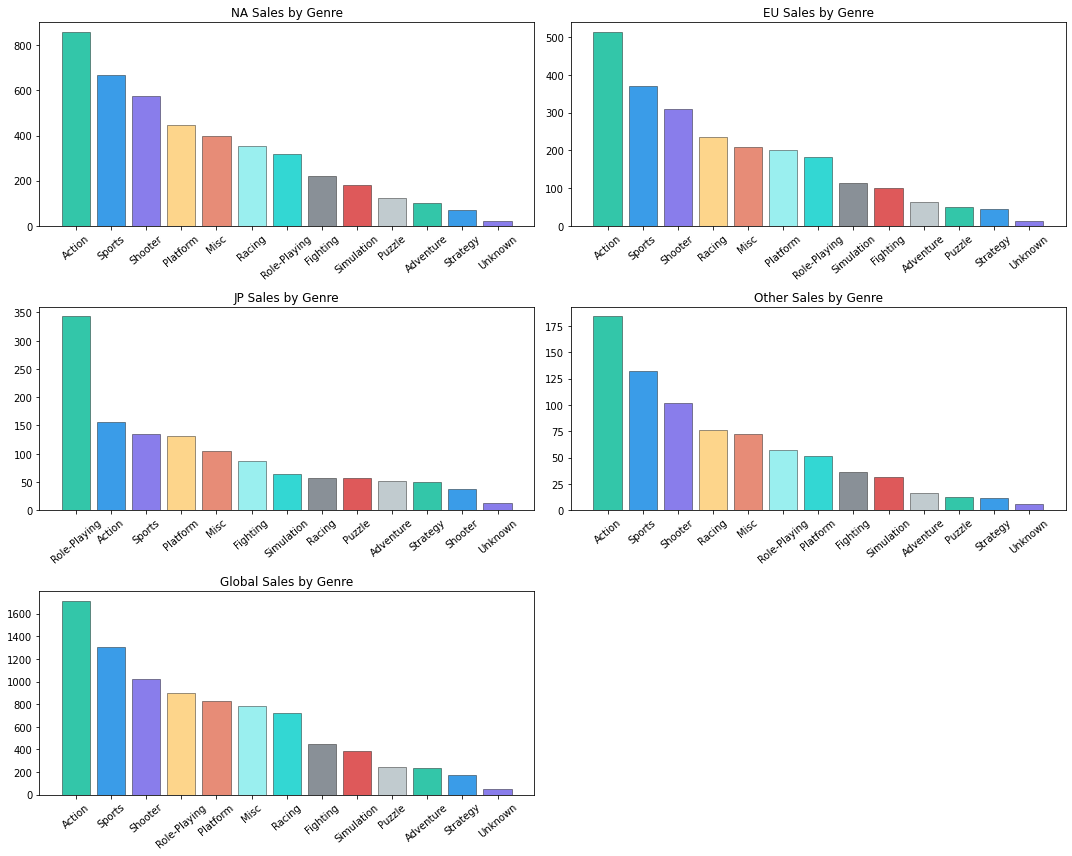

In [18]:
# NA 지역은 출고량이 높은 순으로 Action, Sports, Shooter, Platform, Misc, Racing 장르가 기록함
# EU 지역은 출고량이 높은 순으로 Action, Sports, Shooter, Racing, Misc, Platform 장르가 기록함
# JP 지역은 출고량이 높은 순으로 Role-Playing, Action, Sports, Platform, Misc, Fighting 장르가 기록함
# Other 지역은 출고량이 높은 순으로 Action, Sports, Shooter, Racing, Misc, Role-Playing 장르가 기록함
# 전체 지역은 출고량이 높은 순으로 Action, Sports, Shooter, Role-Playing, Platform, Misc 장르가 기록함

na_genre = df.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False)
eu_genre = df.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False)
jp_genre = df.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False)
other_genre = df.groupby(['Genre'])['Other_Sales'].sum().sort_values(ascending=False)
global_genre = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

colors = ['#00b894', '#0984e3', '#6c5ce7', '#fdcb6e', '#e17055', '#81ecec', '#00cec9', '#6c757d', '#d63031', '#b2bec3']

fig, ax = plt.subplots(3, 2, figsize=(15, 12))

ax[0, 0].bar(na_genre.index, na_genre.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax[0, 0].set_title('NA Sales by Genre')
ax[0, 0].tick_params(axis='x', rotation=40)

ax[0, 1].bar(eu_genre.index, eu_genre.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax[0, 1].set_title('EU Sales by Genre')
ax[0, 1].tick_params(axis='x', rotation=40)

ax[1, 0].bar(jp_genre.index, jp_genre.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax[1, 0].set_title('JP Sales by Genre')
ax[1, 0].tick_params(axis='x', rotation=40)

ax[1, 1].bar(other_genre.index, other_genre.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax[1, 1].set_title('Other Sales by Genre')
ax[1, 1].tick_params(axis='x', rotation=40)

ax[2, 0].bar(global_genre.index, global_genre.values, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax[2, 0].set_title('Global Sales by Genre')
ax[2, 0].tick_params(axis='x', rotation=40)
fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()


- 전체 지역 출고량은 출고량의 대략 80%를 차지하는 NA 지역과 EU지역의 영향이 클 수 밖에 없으므로 전체 지역 장르별 출고량이 두 지역과 유사하다.
- 그러나 JP 지역의 Role-Playing, Fighting 장르 출고량을 볼 때, 지역별 문화나 취향, 인구 구성 등의 요인에 따라 게임 장르에 대한 선호도에 차이가 있음을 확인할 수 있다. 또한, NA 지역과 EU 지역의 출고량의 순위도 같지 않고 일정 부분 다르기 때문에 지역별 선호 게임 장르는 확실하게 다르다는 점을 파악할 수 있다.

### `Process 3`: 연도별 게임의 트렌드가 있을까?
> 트렌드는 어떤 것을 기준으로 파악했는가?

> 연도별로 트렌드가 존재하는가?

> 왜 존재한다/존재하지 않는다고 생각했는가?

- 트렌드란? 사상이나 행동 또는 어떤 현상에서 나타나는 일정한 방향을 말한다.
- 게임 시장 트렌드는 다양한 기준으로 파악될 수 있으나, 주어진 데이터로서는 시간을 나타내는 'Year' 컬럼을 이용하여 분석을 하는 것이 효과적이라고 판단했다. 따라서 'Year' 컬럼을 기준으로 각각 장르별 트렌드와 플랫폼별 트렌드를 파악하고자 한다.

In [20]:
# 연도별 출고량을 각각 파악해본 결과 데이터는 2016년도 2-3분기 이내까지 축적된 것으로 추정
year_sales = df.groupby(['Year']).sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
year_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35
1985,33.73,4.74,14.56,0.92,53.95
1986,12.50,2.84,19.81,1.93,37.08
1987,8.46,1.41,11.63,0.20,21.70
1988,23.87,6.59,15.76,0.99,47.21


In [21]:
# 위 데이터를 선 그래프로 파악해봄
# 2008년에 절정을 이루고 그 이후로 2013년에 소폭 상승이 있었으나 계속된 하락세를 보임

import plotly.graph_objects as go
color_sequence = ['#F44336', '#FFC107', '#4CAF50', '#2196F3', '#9C27B0']
fig = go.Figure()

fig.add_trace(go.Scatter(x=year_sales.index, y=year_sales['NA_Sales'], mode='lines', name='North America', line=dict(color=color_sequence[0])))
fig.add_trace(go.Scatter(x=year_sales.index, y=year_sales['EU_Sales'], mode='lines', name='Europe', line=dict(color=color_sequence[1])))
fig.add_trace(go.Scatter(x=year_sales.index, y=year_sales['JP_Sales'], mode='lines', name='Japan', line=dict(color=color_sequence[2])))
fig.add_trace(go.Scatter(x=year_sales.index, y=year_sales['Other_Sales'], mode='lines', name='Others', line=dict(color=color_sequence[3])))
fig.add_trace(go.Scatter(x=year_sales.index, y=year_sales['Global_Sales'], mode='lines', name='Global', line=dict(color=color_sequence[4])))

fig.update_layout(title='Video Game Sales by Year and Region',
                  xaxis_title='Year',
                  yaxis_title='Sales (millions)',
                  font=dict(family='Courier New, monospace',size=16,color='#2d3436'),plot_bgcolor='white')
fig.show()


In [42]:
# 산점도를 이용하여 연도에 따른 전체 지역 출고량을 파악해봄 
# 연도별 상위 항목들에 대해 파악하기 용이함 
import plotly.express as px

color_sequence = px.colors.qualitative.D3

fig = px.scatter(df, x="Year", y="Global_Sales", color="Genre",
                 size='Global_Sales', hover_data=['Name'],
                 title="Video Game Global Sales by Year and Genre",
                 labels={'x':'Years', 'y':'Global Sales'},
                 color_discrete_sequence=color_sequence
                )

fig.update_layout(width=1000, height=500, plot_bgcolor='#f2f2f2', hoverlabel=dict(bgcolor='white', font_size=14))
fig.update_traces(marker=dict(sizemode='area', sizemin=5, opacity=0.8, line=dict(width=0.5, color='black')))
fig.show()

In [22]:
# 매 연도에 따라 장르별로 게임 출고량을 그래프로 파악하기가 어려움
# 5년 단위로 트렌드를 측정한다고 가정했을 때, 5년 동안의 출고량을 장르별로 합하여 각 기간마다 상위 5개의 장르를 비교해보고자 함
# 먼저 5년 단위로 묶어서 각 장르별 Sales 합계를 계산

df2= df.copy()
bins = [1980, 1984, 1989, 1994, 1999, 2004, 2009, 2016]
labels = ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2016']
df2['Period'] = pd.cut(df2['Year'], bins=bins, labels=labels)
period_sales_genre = df2.groupby(['Period', 'Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().reset_index()
period_sales_genre

,Period,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980-1984,Action,23.40,1.55,0.83,0.22,26.00
1,1980-1984,Adventure,0.38,0.02,0.00,0.00,0.40
2,1980-1984,Fighting,0.00,0.00,0.00,0.00,0.00
3,1980-1984,Misc,0.82,0.05,3.58,0.01,4.46
4,1980-1984,Platform,13.96,1.08,4.31,0.22,19.57
...,...,...,...,...,...,...,...
86,2010-2016,Shooter,227.63,166.44,13.54,55.03,462.64
87,2010-2016,Simulation,26.42,25.38,13.20,5.98,70.98
88,2010-2016,Sports,154.03,115.63,15.34,39.28,324.28
89,2010-2016,Strategy,13.31,12.40,6.60,3.50,35.81


In [23]:
# 각 기간마다 장르별로 총 출고량 기준으로 상위 5개를 추출
top5_by_period = period_sales_genre.groupby('Period').apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True)
top5_by_period

,Period,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980-1984,Shooter,41.16,1.65,1.96,0.65,45.42
1,1980-1984,Action,23.40,1.55,0.83,0.22,26.00
2,1980-1984,Platform,13.96,1.08,4.31,0.22,19.57
3,1980-1984,Puzzle,12.85,0.94,2.23,0.19,16.21
4,1980-1984,Sports,4.15,0.59,6.37,0.10,11.21
5,1985-1989,Platform,60.38,12.16,28.14,2.01,102.69
6,1985-1989,Puzzle,30.84,4.49,10.24,0.97,46.54
7,1985-1989,Action,14.18,2.72,7.48,0.38,24.76
8,1985-1989,Sports,6.54,1.95,11.83,0.25,20.57
9,1985-1989,Role-Playing,1.06,0.00,12.68,1.51,15.25


In [24]:
# 각 기간별로 Global Sales가 가장 큰 상위 5개의 장르를 추출
top5_by_period = period_sales_genre.groupby('Period').apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True)
top5_by_period

,Period,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980-1984,Shooter,41.16,1.65,1.96,0.65,45.42
1,1980-1984,Action,23.40,1.55,0.83,0.22,26.00
2,1980-1984,Platform,13.96,1.08,4.31,0.22,19.57
3,1980-1984,Puzzle,12.85,0.94,2.23,0.19,16.21
4,1980-1984,Sports,4.15,0.59,6.37,0.10,11.21
5,1985-1989,Platform,60.38,12.16,28.14,2.01,102.69
6,1985-1989,Puzzle,30.84,4.49,10.24,0.97,46.54
7,1985-1989,Action,14.18,2.72,7.48,0.38,24.76
8,1985-1989,Sports,6.54,1.95,11.83,0.25,20.57
9,1985-1989,Role-Playing,1.06,0.00,12.68,1.51,15.25


<Figure size 2160x1080 with 0 Axes>

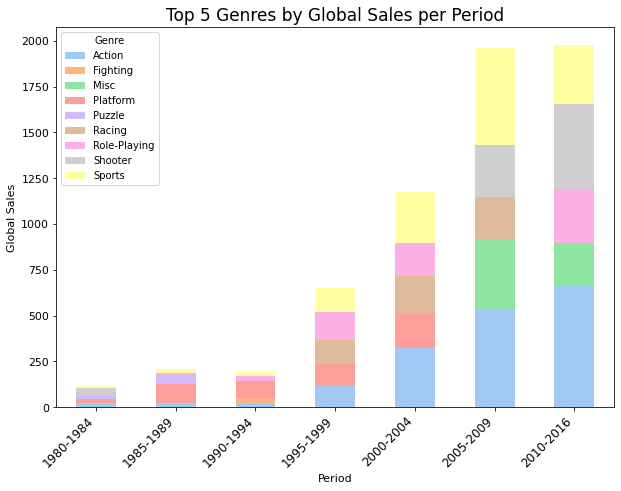

In [25]:
# 이를 비교할 수 있는 막대그래프로 시각화
top5_by_period_pivot = top5_by_period.pivot(index='Period', columns='Genre', values='Global_Sales')

plt.figure(figsize=(30, 15))
sns.set_palette("pastel")

ax = top5_by_period_pivot.plot(kind='bar', stacked=True)
ax.set_title('Top 5 Genres by Global Sales per Period', fontsize=17)
ax.set_xlabel('Period', fontsize=11)
ax.set_ylabel('Global Sales', fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xticklabels(top5_by_period_pivot.index, rotation=45, ha='right', fontsize=12)
plt.show()

- 각 연도별로 트렌드를 파악하기가 쉽지 않았다. 왜냐하면 트렌드라는 것은 매년 바뀌는 것이 아니라, 시대적 상황, 환경, 문화, 맥락 등의 여러가지 요소가 작용하기 때문에 기간이 짧을 수도 있고 길수도 있기 때문이다. 
- 그리하여 5년 단위로 묶어 트렌드를 파악하고자 시도했고, 각 기간(5년)마다 장르별로 출고량을 모두 합하여 상위 5개의 장르를 비교해보았다.
- 막대그래프로 시각화해본 결과, 1980-2004년까지는 'Platform' 게임이 계속해서 상위권을 차지했으나 이후로는 밀려난 추세이고, 'Sports', 'Action' 게임은 1980년 이후로 계속해서 상당부분 인기를 차지하고 있음을 알 수 있다. 또한 'Role-Playing' 게임은 인기가 있었던 기간과 그렇지 않은 기간을 확연히 볼 수 있어 각 기간마다 인기있는 장르가 다름을 파악할 수 있었다.

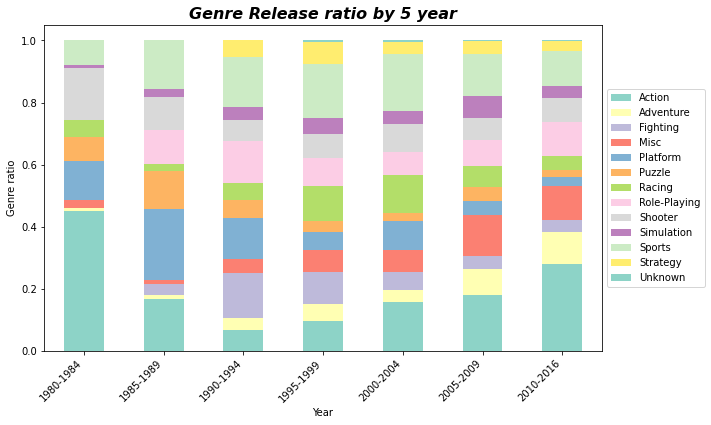

In [26]:
# 장르별 개수를 활용
# 'Name' 컬럼을 기준으로 연도별(5년 단위)로 장르에 따른 출시된 게임 수 / 연도별(5년 단위)로 출시된 게임 수의 비율로 트렌드 파악을 시도해봄 
df3 = df.copy()

# 연도별로 출시된 게임 수를 파악함
games_by_year = df3.groupby('Year')['Name'].count().reset_index(name='total_games')

# '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2016' 단위로 출시된 게임 수를 더함
df3['Year Range'] = pd.cut(df3['Year'], bins=[1980, 1984, 1989, 1994, 1999, 2004, 2009, 2016], labels=['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2016'])

# 각 범주별 게임 수를 구하여 데이터프레임으로 출력
games_by_range = df3.groupby('Year Range')['Name'].count().reset_index(name='Total Games All')

# '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2016' 단위로 장르별로 출시된 게임 수를 더함
genre_by_range = df3.groupby(['Year Range', 'Genre'])['Name'].count().reset_index(name='Total Games')

merged_df = pd.merge(games_by_range, genre_by_range, on='Year Range')

merged_df['genre_ratio'] = merged_df['Total Games'] / merged_df['Total Games All']

genre_ratio_table = merged_df.pivot_table(values='genre_ratio', index='Year Range', columns='Genre')

colors = sns.color_palette('Set3', 30)

ax = genre_ratio_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Genre Release ratio by 5 year',fontsize=16, fontweight='bold', fontstyle='italic')
plt.xlabel('Year')
plt.ylabel('Genre ratio')
plt.xticks(rotation=45, ha='right')
plt.show()

- 5년 단위로 출시된 총 게임 개수 중 장르별 개수를 구하여 해당 기간 동안의 비율을 구해보았다. 이를 통해 기간마다 출시하는 장르의 비율이 매번 달랐고, 이는 게임 회사마다 전략적으로 트렌드를 파악하여 장르별로 게임을 출시했다고 볼 수 있다.
- 따라서 연도별로 트렌드는 존재한다고 생각하지만, 연도의 단위를 어떻게 잡느냐에 따라 트렌드를 조금씩 다르게 파악할 수 있을 것이라 예상한다. 추가적으로 5년의 단위로 나누는 것이 적절한지, 앞선 그래프에서는 상위 5개의 장르만 선택하여 분석한 것이 합당한지에 대해서는 어떤 식으로 판단을 하면 더 정확할지 고민해볼 부분이다.

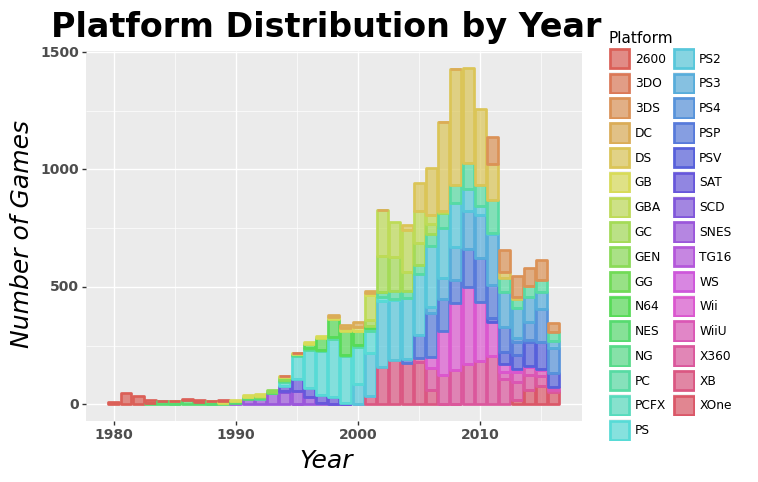

<ggplot: (8733538924442)>

In [27]:
# 연도별 플랫폼에 따른 출시하는 게임 수 파악
# 트렌드를 알기 위해서는 추이를 파악해야 하는데 시각화로 나타내기가 쉽지 않음
from plotnine import *
platform_by_year = df.groupby(['Year', 'Platform'])['Name'].count().reset_index(name='count')

freq_genre = df['Genre'].value_counts().reset_index()
freq_genre.columns = ['Genre', 'Frequency']

(ggplot(platform_by_year, aes(x='Year', y='count', fill='Platform', color='Platform')) 
 + geom_bar(stat='identity', alpha=0.7, size=1.1) 
 + ggtitle('Platform Distribution by Year') 
 + xlab('Year') 
 + ylab('Number of Games') 
 + theme(
     plot_title=element_text(size=24, face='bold', ha='center'), 
     axis_title_x=element_text(size=18, face='italic', ha='center'), 
     axis_title_y=element_text(size=18, face='italic'), 
     axis_text_x=element_text(size=10, face='bold', angle=0), 
     axis_text_y=element_text(size=10, face='bold'), 
     legend_position='right'
   )
)

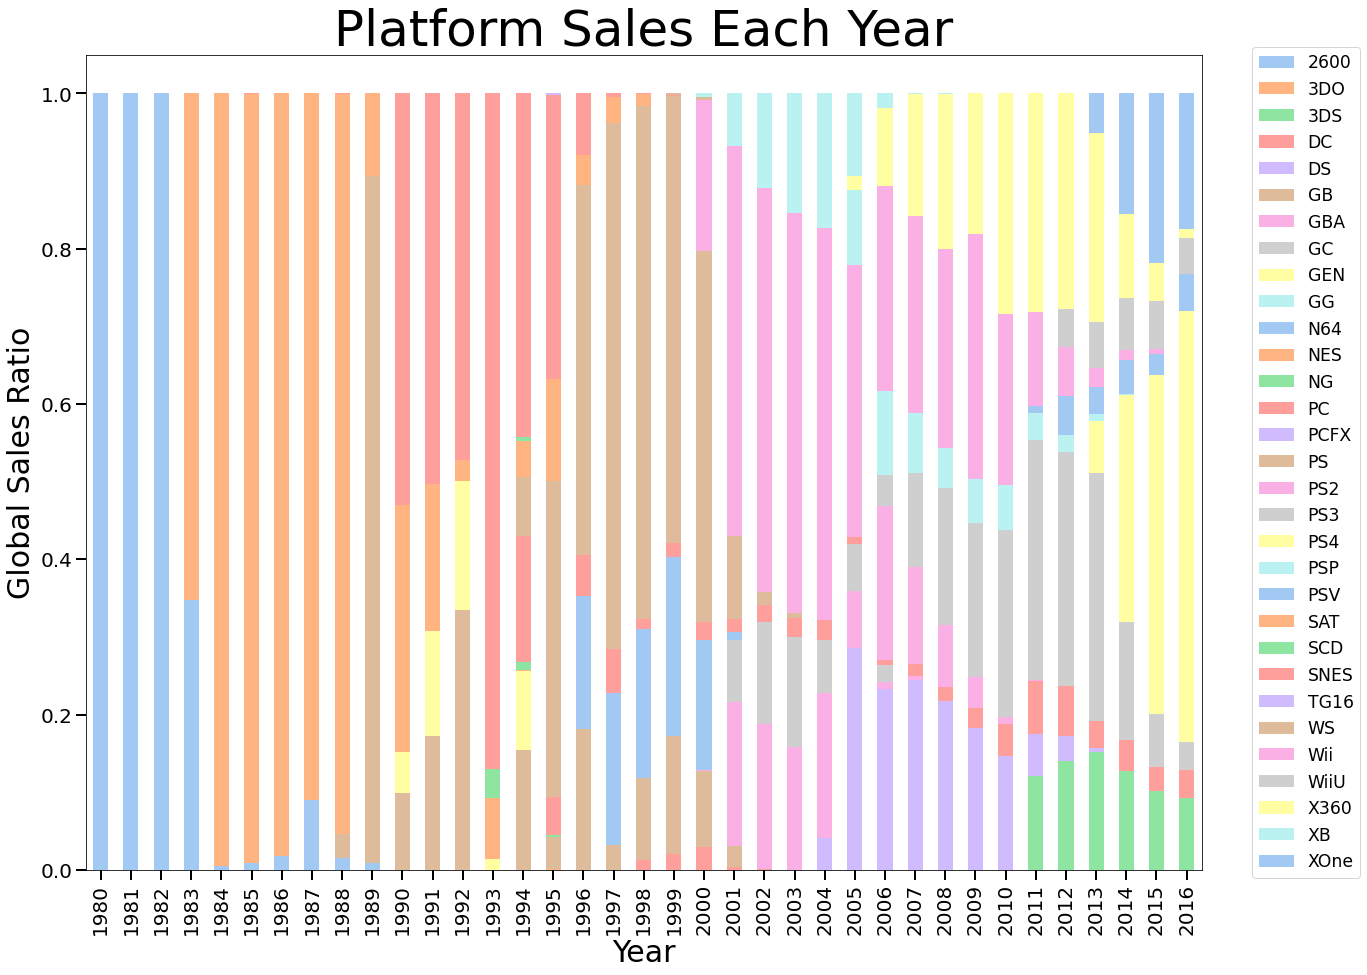

In [28]:
# 연도별 플랫폼에 따른 전체 출고량 파악

sales_by_platform_year = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
sales_by_platform_year['Global_Sales_Ratio'] = sales_by_platform_year.groupby('Year')['Global_Sales'].apply(lambda x: x / x.sum())

# 시각화
fig, ax = plt.subplots(figsize=(20, 15))
sales_by_platform_year.pivot(index='Year', columns='Platform', values='Global_Sales_Ratio').plot(kind='bar', stacked=True, ax=ax)
ax.legend(fontsize='xx-large', loc='center right', bbox_to_anchor=(1.15, 0.5))
ax.set_title('Platform Sales Each Year', fontsize=50)
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Global Sales Ratio', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(axis='x', length=10, width=2)
ax.tick_params(axis='y', length=10, width=2)
plt.show()

- 플랫폼 수가 많다보니 이를 시각화하여 어떠한 의미를 뽑아내기가 쉽지 않았다. 다만, 연도에 따른 플랫폼별 개수, 출고량을 기준으로 살펴본 결과 플랫폼의 트렌드는 변화한다는 사실을 추측할 수 있었다. 그런데, 한 플랫폼 회사에서 업그레이드한 플랫폼을 출시함에 따라 변화가 나타날 수 밖에 없다는 사실을 인지했고 이를 다시 플랫폼 회사를 기준으로 나누어 인기가 많은 플랫폼 회사의 특징이 무엇인지 파악하는 쪽으로 분석을 해보고자 했다.

In [29]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [30]:
# 플랫폼을 회사 별로 나누어서 새로운 열을 만들어 추가

df4 = df.copy()

conditions = [    df['Platform'].isin(['DS', 'Wii', 'WiiU', 'GBA', '3DS', 'GB', 'NES', 'GC', 'N64', 'SNES']),
    df['Platform'].isin(['PSP', 'PS3', 'PS', 'PS4', 'PS2', 'PSV']),
    df['Platform'].isin(['XB', 'X360', 'XOne']),
    df['Platform'].isin(['SAT', 'GEN', 'SCD', 'DC', 'GG']),
    df['Platform'].isin(['2600']),
    df['Platform'].isin(['TG16', 'PCFX']),
    df['Platform'].isin(['NG']),
    df['Platform'].isin(['WS']),
    df['Platform'].isin(['3DO']),
    df['Platform'].isin(['PC']),
]
choices = ['Nintendo', 'Sony', 'Microsoft', 'Sega', 'Atari', 'Nec', 'Snk', 'Bandai', 'Panasonic', 'ETC(PC)']

df4['Platform_Corp'] = np.select(conditions, choices, default='Unknown')
df4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Corp
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Nintendo
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Nintendo
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Sony
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Nintendo
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Sony
...,...,...,...,...,...,...,...,...,...,...,...
16319,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,Nintendo
16320,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Sony
16321,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Sony
16322,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,Sony


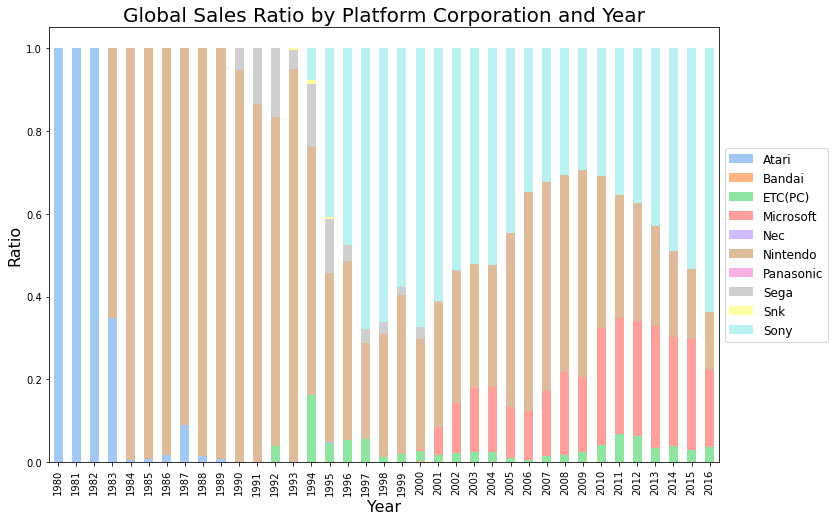

In [31]:
sales_by_platform = df4.groupby(['Platform_Corp', 'Year'])['Global_Sales'].sum().reset_index()
pivot_sales = sales_by_platform.pivot_table(index='Year', columns='Platform_Corp', values='Global_Sales', aggfunc='sum')
pivot_ratio = pivot_sales.div(pivot_sales.sum(axis=1), axis=0)

pivot_ratio.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Global Sales Ratio by Platform Corporation and Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Ratio', fontsize=16)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- 플랫폼 회사를 기준으로 1980년대 초반에는 Atari 회사의 플랫폼이 거의 다수를 차지하고 있다가, 1983년 이후 Nintendo 회사의 플랫폼이 주류를 이루었고 1994년 이후 Sony 회사의 플랫폼과의 경쟁 체제를 이뤄가고 있는 상황임을 볼 수 있다. 2000년대 이후로는 Microsoft 회사의 플랫폼도 인기를 보이고 있어 크게 3강 체제를 이루고 있는 시점이다.

In [32]:
# 상위 3개의 회사인 Sony, Nintendo, Microsoft 사의 비율을 분석하기 위함
# 2000년 이후 Sony, Nintendo, Microsoft 사의 플랫폼별 게임수를 파악하고자 함
selected_platforms = ['Sony', 'Nintendo', 'Microsoft']
platform_by_year = df4[df4['Platform_Corp'].isin(selected_platforms)].groupby(['Year', 'Platform', 'Platform_Corp'])['Name'].count().reset_index(name='count')
platform_by_year2 = platform_by_year[(platform_by_year['Year'] >= 2000)]
platform_by_year2

,Year,Platform,Platform_Corp,count
44,2000,GB,Nintendo,17
45,2000,GBA,Nintendo,1
46,2000,N64,Nintendo,60
47,2000,PS,Sony,159
48,2000,PS2,Sony,82
...,...,...,...,...
165,2016,PS4,Sony,107
166,2016,PSV,Sony,60
167,2016,WiiU,Nintendo,10
168,2016,X360,Microsoft,8


In [33]:
# 2000년 이후 Sony, Nintendo, Microsoft 사의 플랫폼별 총 출고량을 파악하고자 함
sales_by_platform2 = df4[df4['Platform_Corp'].isin(selected_platforms)].groupby(['Year', 'Platform', 'Platform_Corp'])['Global_Sales'].sum().reset_index()
sales_by_platform2 = sales_by_platform2[(sales_by_platform2['Year'] >= 2000)]
sales_by_platform2

,Year,Platform,Platform_Corp,Global_Sales
44,2000,GB,Nintendo,19.76
45,2000,GBA,Nintendo,0.07
46,2000,N64,Nintendo,33.97
47,2000,PS,Sony,96.35
48,2000,PS2,Sony,39.17
...,...,...,...,...
165,2016,PS4,Sony,39.30
166,2016,PSV,Sony,3.38
167,2016,WiiU,Nintendo,3.28
168,2016,X360,Microsoft,0.83


- 그럼 여기서 플랫폼별 게임 수가 많을수록 플랫폼별 출고량도 많을 지를 알아보고자 한다.
- 귀무가설 : 플랫폼별 게임 수가 많을수록 플랫폼별 출고량은 많지 않다.
- 대립가설 : 플랫폼별 게임 수가 많을수록 플랫폼별 출고량은 많다.  


In [34]:
# 2000년 이후 플랫폼별 게임 수가 많을 수록 플랫폼별 출고량도 많을지 가설 검정 시도
# 귀무가설: 플랫폼별 게임 수가 많을수록 플랫폼별 출고량은 많지 않다.
# 대립가설: 플랫폼별 게임 수가 많을수록 플랫폼별 출고량은 많다.

from scipy.stats import ttest_ind

# 플랫폼별 게임 수 데이터
count_data = platform_by_year2.groupby('Platform')['count'].sum()

# 플랫폼별 출고량 데이터
sales_data = sales_by_platform2.set_index('Platform')['Global_Sales']

# t-test를 수행
t, p = ttest_ind(count_data, sales_data, equal_var=False)

# p-value 출력
print('p-value:', p)

# P-value 값이 0.05 이하가 나왔으므로 대립가설을 채택한다.

p-value: 0.0003294213041737918


- 위와 같은 가설검정을 토대로 대립가설을 채택하여 다음과 같은 결론을 도출하였다.
- Sony는 제품군을 하나의 제품군을 출시하는 것이 아니라, 삼성이 매년 Z플립, 갤럭시 S시리즈의 여러 제품군을 출시하는 것처럼 여러 플랫폼 제품군을 출시하면서 플랫폼에 따른 게임 수도 다량으로 출시하고 있기에 출고량이 1위를 차지하고 있는 것으로 볼 수 있다. 
- Nintendo는 Sony와 마찬가지로 여러 플랫폼 제품군을 출시하지만 플랫폼에 따른 게임 수가 부족하여 최근에 Microsoft에게 밀리고 있는 실정이다. 반면 Microsoft는 하나의 플랫폼 제품군을 출시하지만 비교적 출시하는 게임 수가 많기에 2013년 이후 출고량 2위를 차지하고 있다. 
- 다시 돌아와서, 연도별 플랫폼을 기준으로 트렌드를 파악하기에는 개인적으로 조금 어려움이 있었다. 이는 추후에 고민이 더 필요한 부분인 것 같다. 

### `Process 4`: 인기가 많은 게임에 대한 분석 및 시각화 프로세스는?
> 인기가 많다는 것을 어떻게 정의했는가?

> 해당 게임이 왜 인기가 많다고 생각했는가?

> 시각화를 통해 무엇을 나타내고자 하는지를 고려했는가?

> 해당 분석을 통해 어떤 인사이트를 도출할 수 있는가?

- 인기가 많은 게임이란? 단순하게 생각했을 때, 많은 사람들이 사용하는 게임 즉 출고량이 많은 게임이다.
- 그러나 앞선 분석으로 살펴보았을 때, 지역별로 선호하는 장르가 다르고 연도별로 트렌드가 존재한다는 것을 알게 되었으니, 인기 또한 마찬가지일 것이다.
- 따라서 인기가 많은 게임을 지역별로 나누어 2005년 이후 출고량이 각 지역의 TOP 20 안에 들었던 게임이라고 정의하고자 한다.
(2005년을 기준으로 잡은 이유는 데이터가 2016년까지밖에 없고, 2016년 또한 1-3분기 내의 데이터로 추측이 되기 때문에 최대한 최근 10여 년간의 데이터를 분석하기 위함)


In [35]:
# 출고량 기준 상위 20위 게임 출력

POP_df = df.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale = POP_df.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.83
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.38
5,Tetris,1989,Puzzle,30.26
6,New Super Mario Bros.,2006,Platform,30.01
7,Wii Play,2006,Misc,29.01
8,New Super Mario Bros. Wii,2009,Platform,28.61
9,Duck Hunt,1984,Shooter,28.31


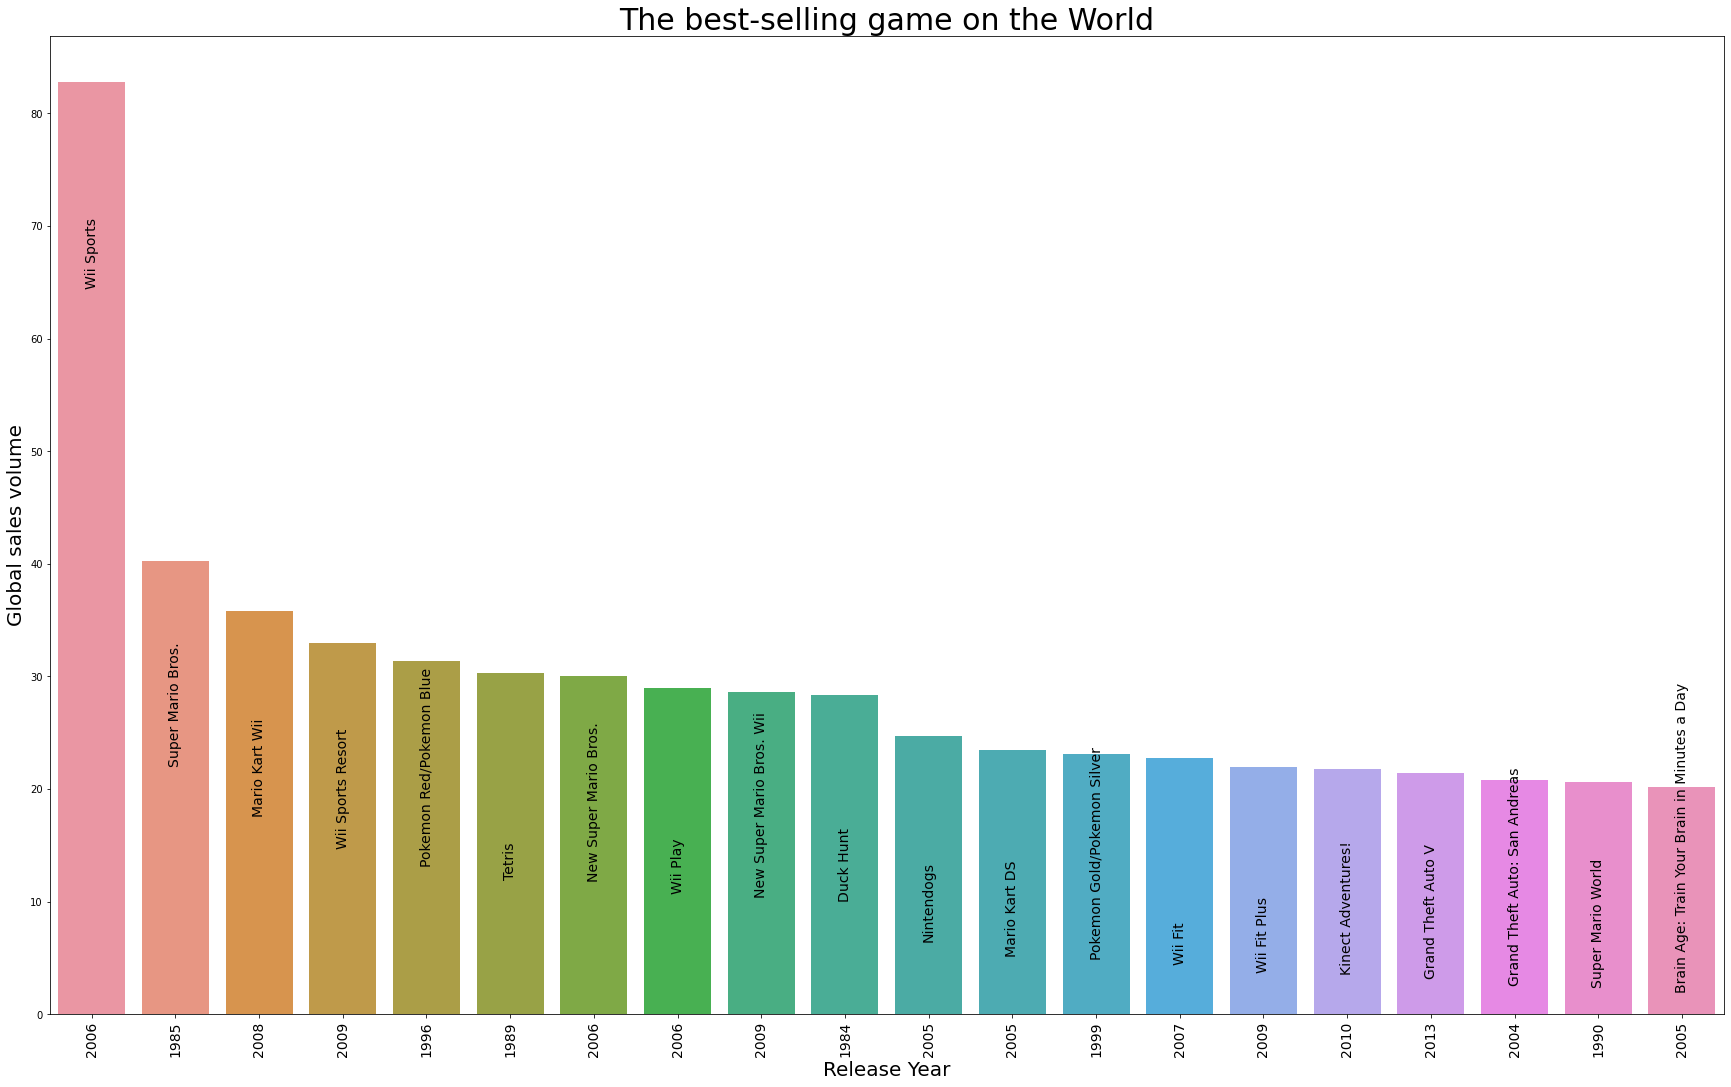

In [36]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.title("The best-selling game on the World", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Global sales volume", fontsize=20)
plt.show()

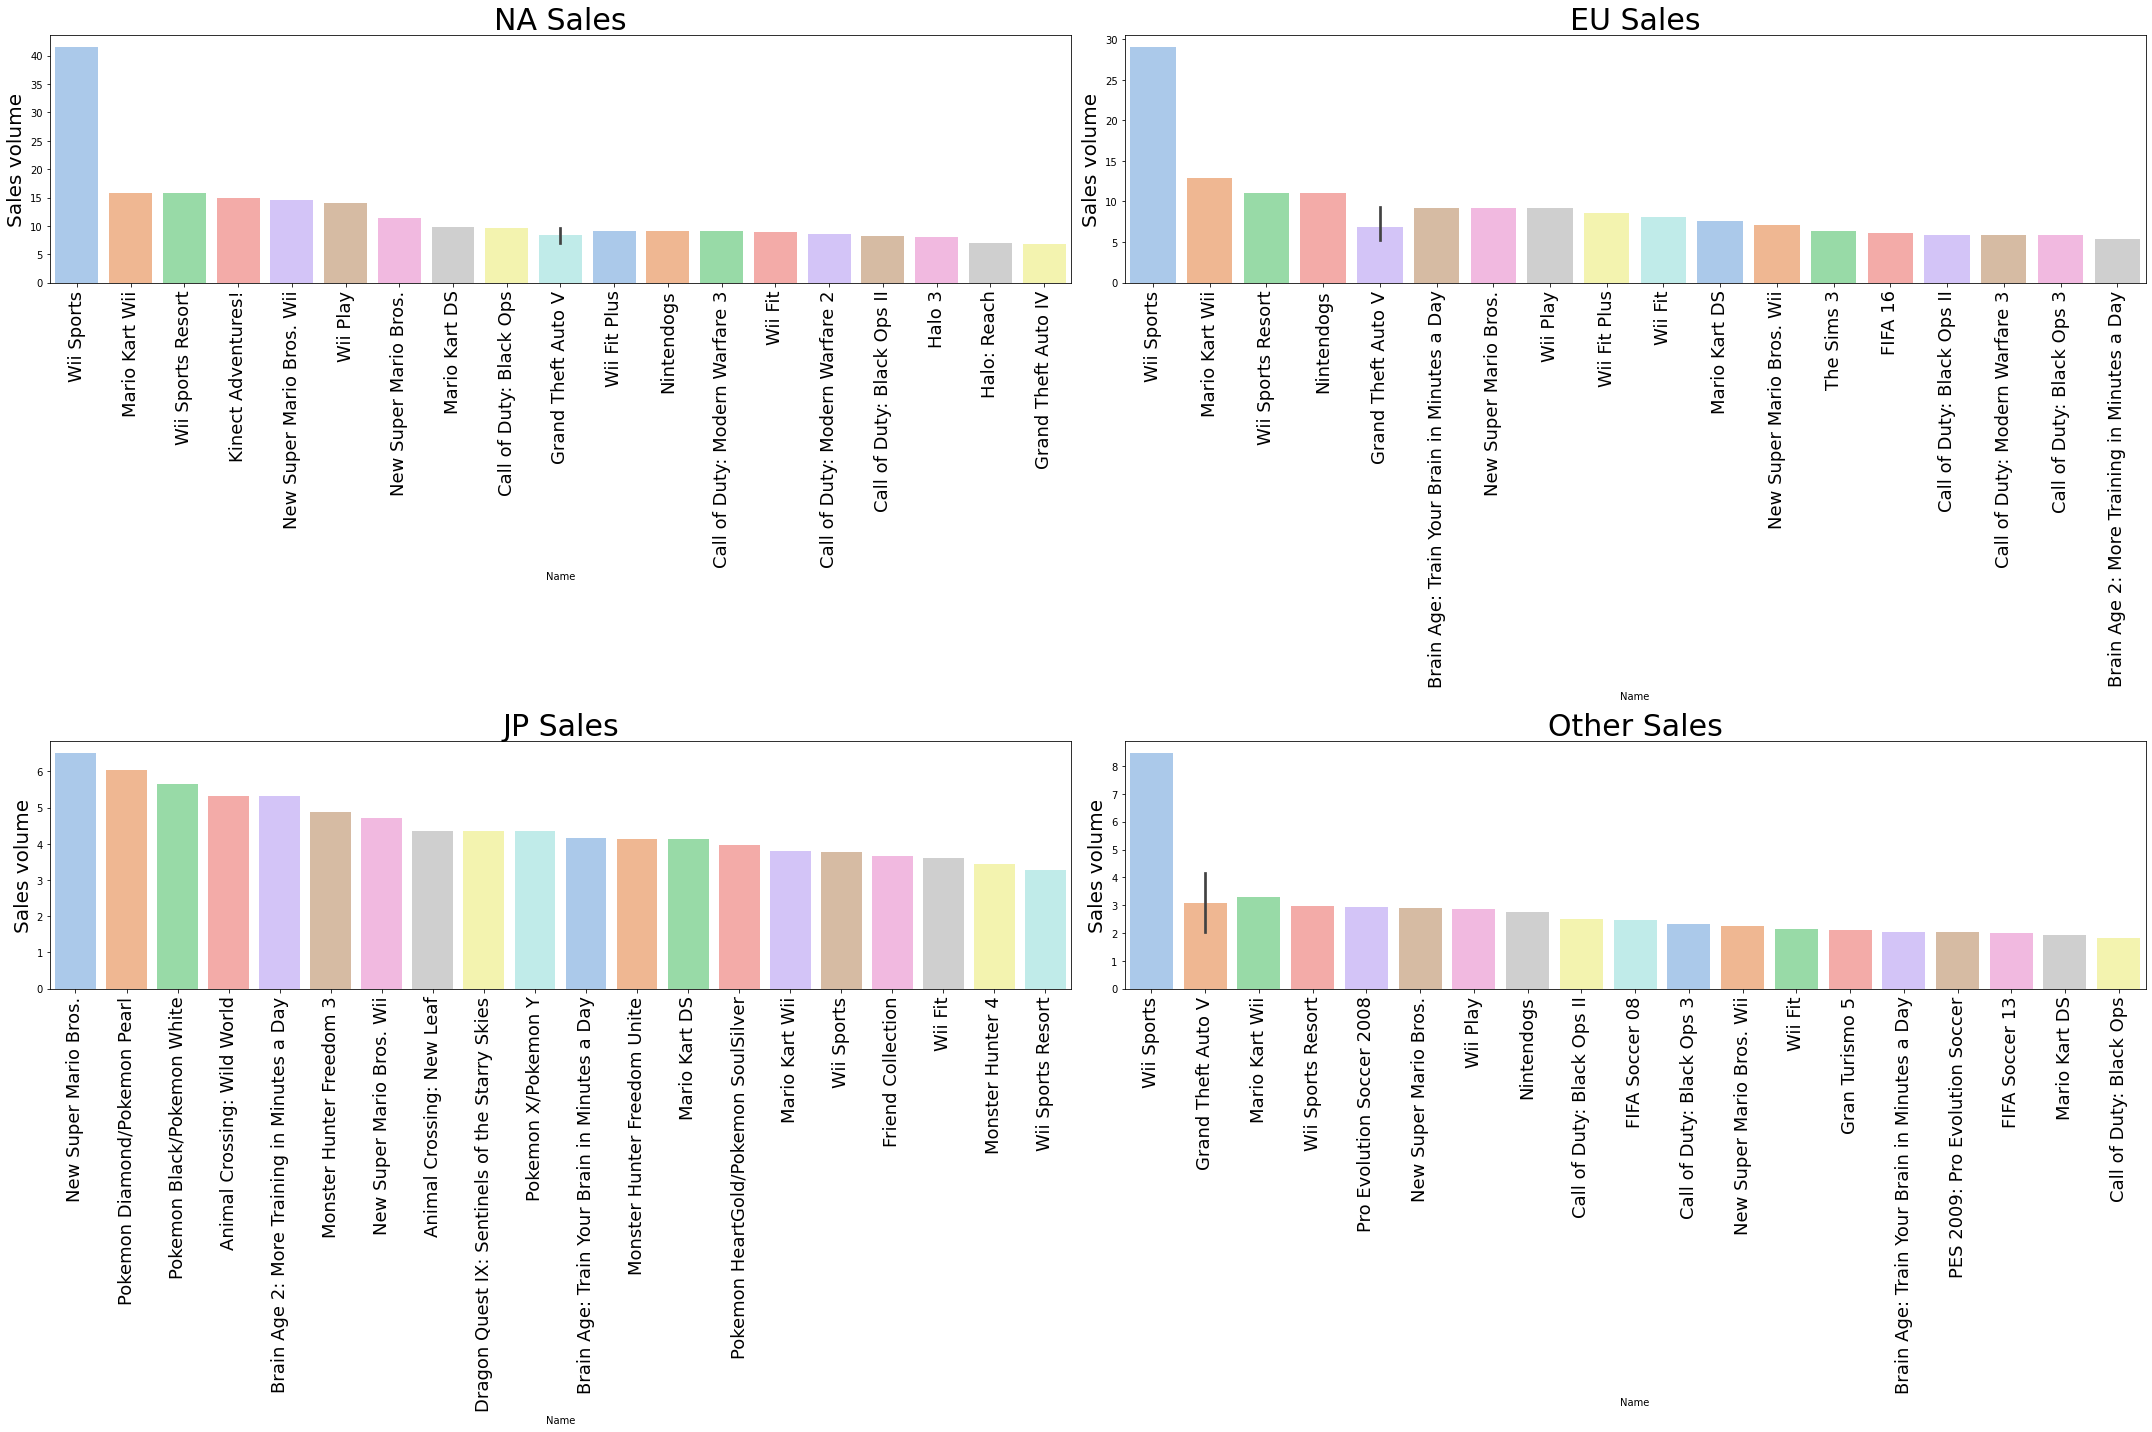

In [37]:
# 지역 별로 2005년 이후 출고량이 많은 순으로 TOP 20까지의 게임을 구하고자 함
df5 = df.copy()
df5 = df5[df5['Year'] >= 2005]

# 각 지역별로 출고량이 가장 많은 20개 게임 추출
na_top20 = df5.nlargest(20, 'NA_Sales')
eu_top20 = df5.nlargest(20, 'EU_Sales')
jp_top20 = df5.nlargest(20, 'JP_Sales')
other_top20 = df5.nlargest(20, 'Other_Sales')

# 지역별 TOP 20 게임의 이름 추출
na_top20_names = na_top20['Name']
eu_top20_names = eu_top20['Name']
jp_top20_names = jp_top20['Name']
other_top20_names = other_top20['Name']

# 지역별 TOP 20 게임의 출고량 추출
na_top20_sales = na_top20['NA_Sales']
eu_top20_sales = eu_top20['EU_Sales']
jp_top20_sales = jp_top20['JP_Sales']
other_top20_sales = other_top20['Other_Sales']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
sns.barplot(x=na_top20_names, y=na_top20_sales, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('NA Sales', fontsize=30)
axes[0, 0].tick_params(axis='x', rotation=90, labelsize=18)
axes[0, 0].set_ylabel('Sales volume', fontsize=20)
sns.barplot(x=eu_top20_names, y=eu_top20_sales, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('EU Sales', fontsize=30)
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=18)
axes[0, 1].set_ylabel('Sales volume', fontsize=20)
sns.barplot(x=jp_top20_names, y=jp_top20_sales, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('JP Sales', fontsize=30)
axes[1, 0].tick_params(axis='x', rotation=90, labelsize=18)
axes[1, 0].set_ylabel('Sales volume', fontsize=20)
sns.barplot(x=other_top20_names, y=other_top20_sales, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Other Sales', fontsize=30)
axes[1, 1].tick_params(axis='x', rotation=90, labelsize=18)
axes[1, 1].set_ylabel('Sales volume', fontsize=20)
plt.tight_layout()
plt.show()

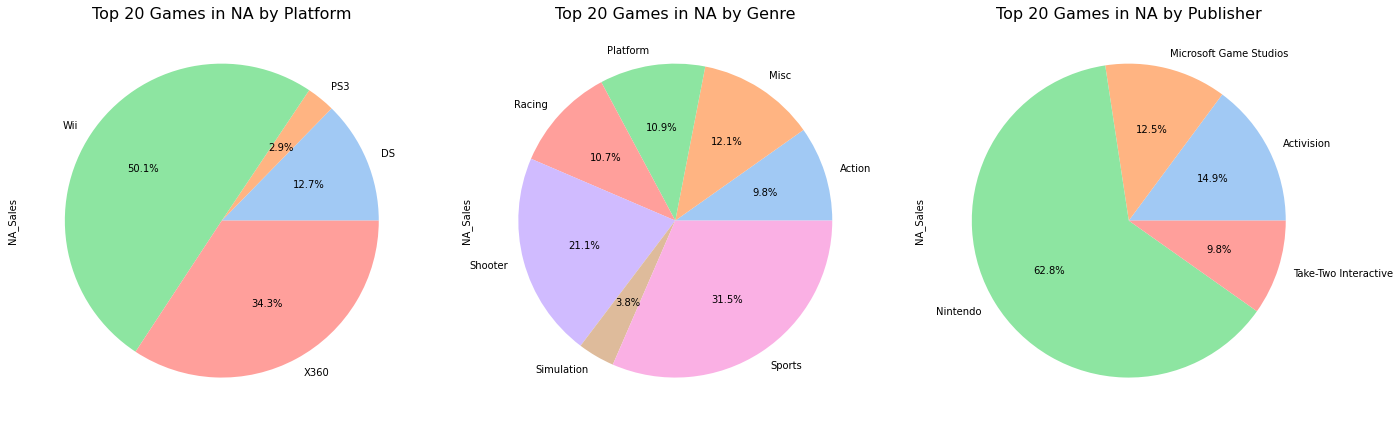

In [38]:
# NA 지역 출고량 top 20위를 활용한 플랫폼과 장르, 배급사를 파악

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.set_palette('pastel')
na_platform = na_top20.groupby(['Platform']).sum()['NA_Sales'].reset_index()
na_platform['NA_Sales'].plot(kind='pie', labels=na_platform['Platform'], autopct='%1.1f%%', ax=axes[0])
na_genre = na_top20.groupby(['Genre']).sum()['NA_Sales'].reset_index()
na_genre['NA_Sales'].plot(kind='pie', labels=na_genre['Genre'], autopct='%1.1f%%', ax=axes[1])
na_publisher = na_top20.groupby(['Publisher']).sum()['NA_Sales'].reset_index()
na_publisher['NA_Sales'].plot(kind='pie', labels=na_publisher['Publisher'], autopct='%1.1f%%', ax=axes[2])
axes[0].set_title('Top 20 Games in NA by Platform', fontsize=16)
axes[1].set_title('Top 20 Games in NA by Genre', fontsize=16)
axes[2].set_title('Top 20 Games in NA by Publisher', fontsize=16)
plt.tight_layout()
plt.show()

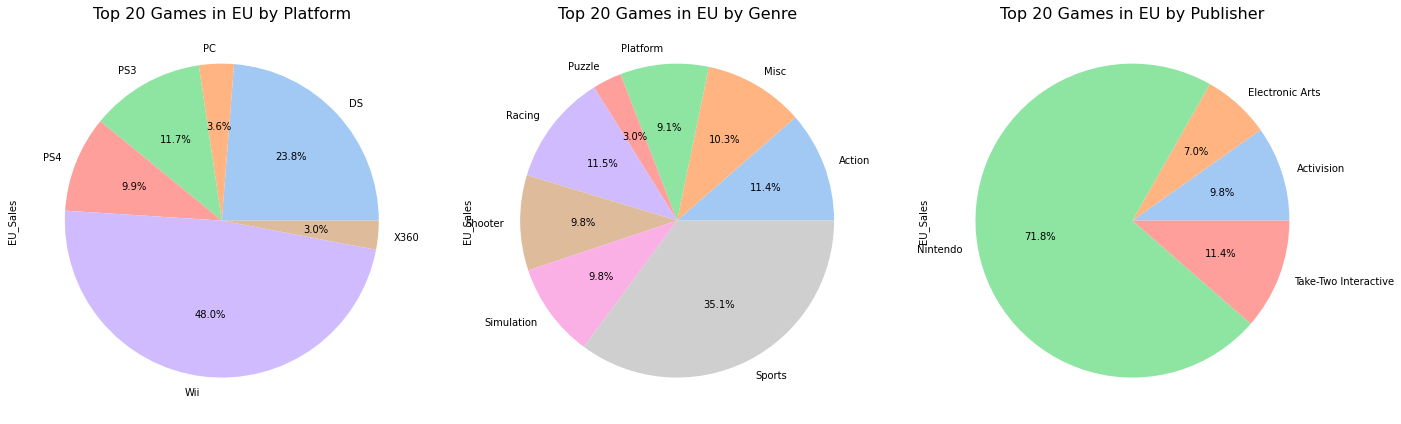

In [39]:
# EU 지역 출고량 top 20위를 활용한 플랫폼과 장르, 배급사를 파악

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.set_palette('pastel')
eu_platform = eu_top20.groupby(['Platform']).sum()['EU_Sales'].reset_index()
eu_platform['EU_Sales'].plot(kind='pie', labels=eu_platform['Platform'], autopct='%1.1f%%', ax=axes[0])
eu_genre = eu_top20.groupby(['Genre']).sum()['EU_Sales'].reset_index()
eu_genre['EU_Sales'].plot(kind='pie', labels=eu_genre['Genre'], autopct='%1.1f%%', ax=axes[1])
eu_publisher = eu_top20.groupby(['Publisher']).sum()['EU_Sales'].reset_index()
eu_publisher['EU_Sales'].plot(kind='pie', labels=eu_publisher['Publisher'], autopct='%1.1f%%', ax=axes[2])
axes[0].set_title('Top 20 Games in EU by Platform', fontsize=16)
axes[1].set_title('Top 20 Games in EU by Genre', fontsize=16)
axes[2].set_title('Top 20 Games in EU by Publisher', fontsize=16)
plt.tight_layout()
plt.show()

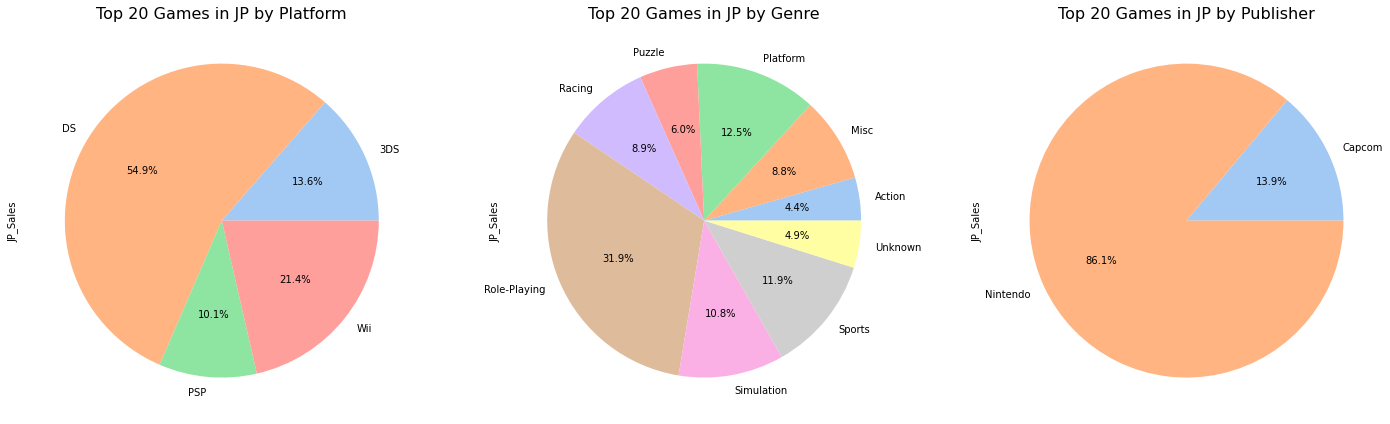

In [40]:
# JP 지역 출고량 top 20위를 활용한 플랫폼과 장르, 배급사를 파악

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.set_palette('pastel')
jp_platform = jp_top20.groupby(['Platform']).sum()['JP_Sales'].reset_index()
jp_platform['JP_Sales'].plot(kind='pie', labels=jp_platform['Platform'], autopct='%1.1f%%', ax=axes[0])
jp_genre = jp_top20.groupby(['Genre']).sum()['JP_Sales'].reset_index()
jp_genre['JP_Sales'].plot(kind='pie', labels=jp_genre['Genre'], autopct='%1.1f%%', ax=axes[1])
jp_publisher = jp_top20.groupby(['Publisher']).sum()['JP_Sales'].reset_index()
jp_publisher['JP_Sales'].plot(kind='pie', labels=jp_publisher['Publisher'], autopct='%1.1f%%', ax=axes[2])
axes[0].set_title('Top 20 Games in JP by Platform', fontsize=16)
axes[1].set_title('Top 20 Games in JP by Genre', fontsize=16)
axes[2].set_title('Top 20 Games in JP by Publisher', fontsize=16)
plt.tight_layout()
plt.show()

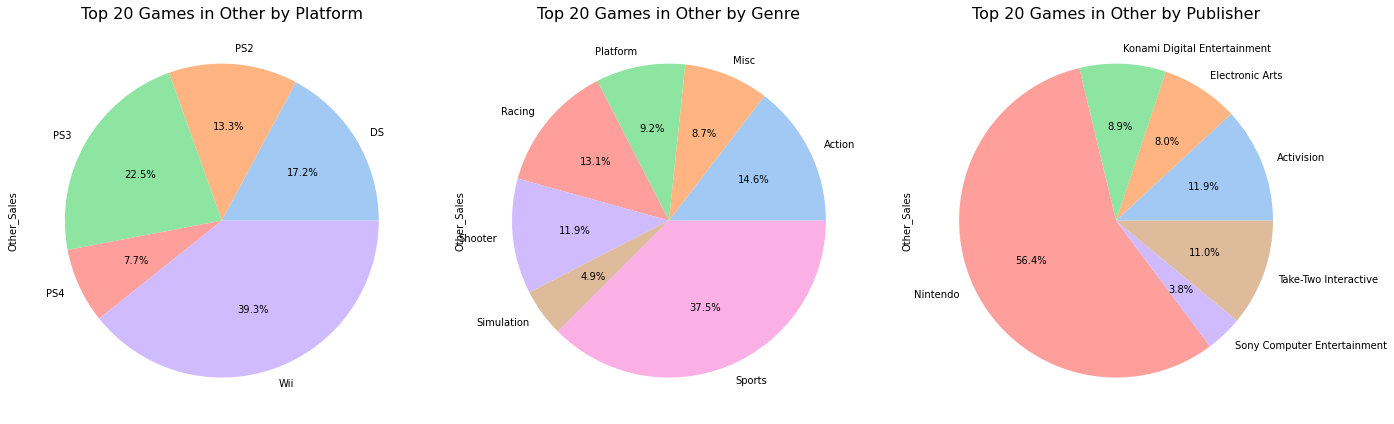

In [41]:
# OTHERS 지역 출고량 top 20위를 활용한 플랫폼과 장르, 배급사를 파악

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.set_palette('pastel')
other_platform = other_top20.groupby(['Platform']).sum()['Other_Sales'].reset_index()
other_platform['Other_Sales'].plot(kind='pie', labels=other_platform['Platform'], autopct='%1.1f%%', ax=axes[0])
other_genre = other_top20.groupby(['Genre']).sum()['Other_Sales'].reset_index()
other_genre['Other_Sales'].plot(kind='pie', labels=other_genre['Genre'], autopct='%1.1f%%', ax=axes[1])
other_publisher = other_top20.groupby(['Publisher']).sum()['Other_Sales'].reset_index()
other_publisher['Other_Sales'].plot(kind='pie', labels=other_publisher['Publisher'], autopct='%1.1f%%', ax=axes[2])
axes[0].set_title('Top 20 Games in Other by Platform', fontsize=16)
axes[1].set_title('Top 20 Games in Other by Genre', fontsize=16)
axes[2].set_title('Top 20 Games in Other by Publisher', fontsize=16)
plt.tight_layout()
plt.show()


- 시각화를 통해 다시 지역별로 인기있는 게임이 다르므로 그에 따른 플랫폼, 장르, 배급사 또한 다름을 파악했고 이를 통해 지역마다의 게임 출시 전략을 다른 방식으로 접근해야 함을 인지했다.

### `Conclusion`: 다음 분기에 어떤 게임을 설계해야 하는가?



> - 데이터를 추가하거나 보충하여 앞서 바라본 분석처럼 각 지역의 선호와 트렌트를 파악한 뒤, 지역마다의 전략을 세워놓고 추가적으로 분석을 가한 뒤 우선순위를 매겨 하나씩 실행에 옮기는 작업이 필요할 것이다.
> - 이와 같은 이유로 결론을 두 가지로 나눠보고자 한다.

##### (1) 2016년 4분기를 예측한다면 ? (주어진 데이터가 2016년 3분기까지라고 가정)


- 인기가 많은 게임을 지역별로 나누어 2005년 이후 출고량이 각 지역의 TOP 20 안에 들었던 게임이라고 정의했을 때,
- NA 지역 : Nintendo, Activision 배급사의 Sports, Shooter 장르에 Wii, X360의 플랫폼을 가진 게임 
- EU 지역 : Nintendo, Take-Two Interactive 배급사의 Sports, Racing, Action 장르에 Wii, DS의 플랫폼을 가진 게임
- JP 지역 : Nintendo, Capcom 배급사의 Role-Playing, Platform 장르에 DS, Wii의 플랫폼을 가진 게임
- 그 외 지역 : Nintendo, Activision, Take-Two Interactive 배급사의 Sports, Action, Racing 장르에 Wii, PS3, DS의 플랫폼을 가진 게임

- 이에 맞는 게임을 설계한다.

##### (2) 2023년 1분기인 현재, 다음 분기를 예측할 수 있을까?

> - 위 자료는 1980년부터 2016년까지의 데이터를 가지고 분석을 해본 것이다.
> - 2023년 1분기인 현재, 이 데이터를 가지고 다음 분기를 예측을 하는 것은 거의 불가능하다. 2017년부터 2023년까지 가장 중요한 최근 6년 간의 데이터가 없기 때문이다.